# Artificial Neural Network compared to Polynomial fit

### Import the classical libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Import libraries for the Artificial Network. Here we work with Scikit-learn

In [15]:
# Import tool to compute rms
from sklearn.metrics import mean_squared_error
# Import stuff for the ANN
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

### Define the function we want to interpolate.

In [16]:
def true_fun(x):
    return np.cos(1.5 * np.pi * x)

### Define some parameters. The X_train and y_train sets are used to determine the polynome coefficients and also to train the neural networks.

In [17]:
# A random seed to reproduce the results
np.random.seed(0)

# The number of points used to fit the function
n_samples = 30

# Noise to be added to the points used to fit the function
noise = 0.1

# The training set: n_samples X points, with the noisy correspoing y  
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * noise
X_train = X
y_train_true = y

# The set of points on which the prediction will be done, to verify the fit quality
X_test = np.linspace(0, 1, 100)
y_test_true = true_fun(X_test)

### Fit the train data with a polynome

In [24]:
degree = 2
p = np.poly1d(np.polyfit(X_train, y_train_true, degree))
y_train = p(X_train)
rms_train = np.sqrt(mean_squared_error(y_train, y_train_true))
y_test = p(X_test)
rms_test = np.sqrt(mean_squared_error(y_test, y_test_true))

### Plot the original data, the polynomial fit and the true function

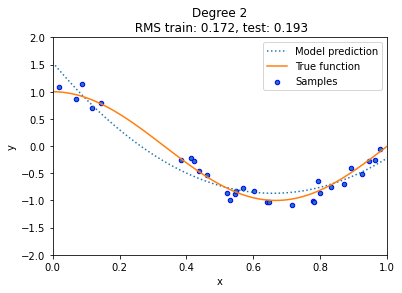

In [25]:
f, ax = plt.subplots()
ax.plot(X_test, y_test, label="Model prediction", ls=':')
ax.plot(X_test, y_test_true, label="True function")
ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.legend(loc="best")
ax.set_title("Degree {}\n RMS train: {:.3f}, test: {:.3f}".format(degree,
             rms_train, rms_test));

### A Neural Network is used on the same data points.

In [51]:
# Instantiate the Multi-layer Perceptron regressor.
# The size of the red is the minimum: only 2 neurons.
# The hyper parameters are used to tunne the network
ANN = MLPRegressor(hidden_layer_sizes=(2,), 
                   tol=1e-6, 
                   max_iter=10000, 
                   activation='tanh',
                   solver='lbfgs')

### The ANN is trained with the same data than the previous polynomial fit.

In [56]:
print(X_train)
print(X_train[..., np.newaxis])

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[[0.0202184 ]
 [0.07103606]
 [0.0871293 ]
 [0.11827443]
 [0.14335329]
 [0.38344152]
 [0.41466194]
 [0.4236548 ]
 [0.43758721]
 [0.46147936]
 [0.52184832]
 [0.52889492]
 [0.54488318]
 [0.5488135 ]
 [0.56804456]
 [0.60276338]
 [0.63992102]
 [0.64589411]
 [0.71518937]
 [0.77815675]
 [0.78052918]
 [0.79172504]
 [0.79915856]
 [0.83261985]
 [0.87001215]
 [0.891773  ]
 [0.92559664]
 [0.94466892]
 [0.96366276]
 [0.97861834]]


In [52]:
ANN.fit(X_train[..., np.newaxis], y_train_true)

MLPRegressor(activation='tanh', hidden_layer_sizes=(2,), max_iter=10000,
             solver='lbfgs', tol=1e-06)

### ANN is used to predict the values. First for the training set, then for the test set.

In [53]:
y_train = ANN.predict(X_train[..., np.newaxis])
rms_train = np.sqrt(mean_squared_error(y_train, y_train_true))
y_test = ANN.predict(X_test[..., np.newaxis])
rms_test = np.sqrt(mean_squared_error(y_test, y_test_true))

### The values of the weigths and the biases are accessible

In [54]:
print(ANN.coefs_, '\n', ANN.intercepts_)

[array([[-1.95710986, -2.70481147]]), array([[-3.25729642],
       [ 2.54855777]])] 
 [array([1.89946571, 1.18196   ]), array([2.10829626])]


### Plotting the results

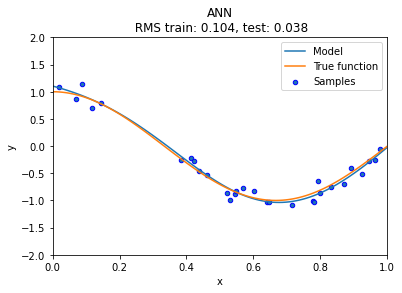

In [55]:
f, ax = plt.subplots()
ax.plot(X_test, y_test, label="Model")
ax.plot(X_test, y_test_true, label="True function")

ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.legend(loc="best")
ax.set_title("ANN\n RMS train: {:.3f}, test: {:.3f}".format(
             rms_train, rms_test));

### Now 3 values are used for the order of the polynom and for the size of the ANN, and comparison is plotted.

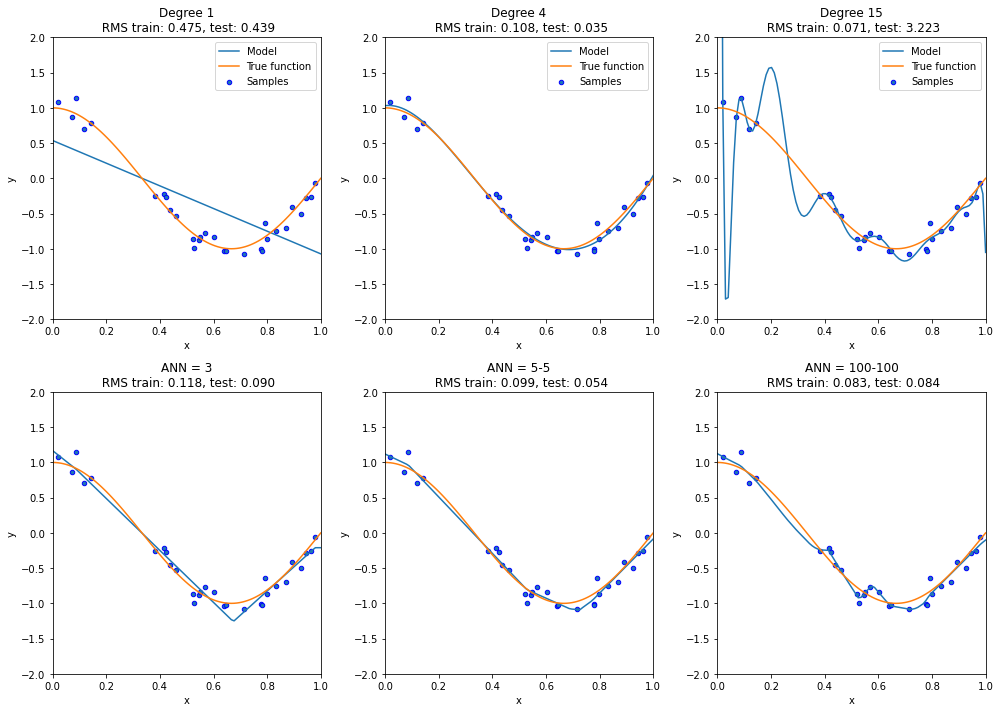

In [64]:
f, axes = plt.subplots(2, 3, figsize=(14, 10))

degrees = [1, 4, 15]
for i in range(len(degrees)):
    ax = axes[0,i]
    p = np.poly1d(np.polyfit(X_train, y_train_true, degrees[i]))
    y_train = p(X_train)
    rms_train = np.sqrt(mean_squared_error(y_train,y_train_true))
    y_test = p(X_test)
    rms_test = np.sqrt(mean_squared_error(y_test,y_test_true))
    ax.plot(X_test, y_test, label="Model")
    ax.plot(X_test, y_test_true, label="True function")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Degree {}\n RMS train: {:.3f}, test: {:.3f}".format( degrees[i],
                 rms_train, rms_test))
    
hidden_layer_sizes_set = ( (3,), (10,5), (100, 100))
hidden_layer_sizes_strs = ('3', '5-5', '100-100')

# The inputs are scaled to help the ANN
scaler = StandardScaler()
scaler.fit(X_train[..., np.newaxis])
X_train_scaled = scaler.transform(X_train[..., np.newaxis])
X_test_scaled = scaler.transform(X_test[..., np.newaxis])
#print(X_train[..., np.newaxis])
#print(X_train_scaled)

for i in range(len(hidden_layer_sizes_set)):
    ANN = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes_set[i], 
                       tol=1e-6, 
                       max_iter=10000, 
                       activation='relu',
                       solver='adam')
    
    ANN.fit(X_train_scaled, y_train_true)
    y_train = ANN.predict(X_train_scaled)
    rms_train = np.sqrt(mean_squared_error(y_train, y_train_true))
    y_test = ANN.predict(X_test_scaled)
    rms_test = np.sqrt(mean_squared_error(y_test, y_test_true))
    ax = axes[1,i]
    ax.plot(X_test, y_test, label="Model")
    ax.plot(X_test, y_test_true, label="True function")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.set_title("ANN = {}\n RMS train: {:.3f}, test: {:.3f}".format(hidden_layer_sizes_strs[i],
                 rms_train, rms_test))
f.tight_layout()